In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
import seaborn as sns

# load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# clean dataset
# clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df_us_da_jobs = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [8]:
df_us_da_location = df_us_da_jobs['job_location'].value_counts().head(10).to_frame()
df_us_da_location


,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


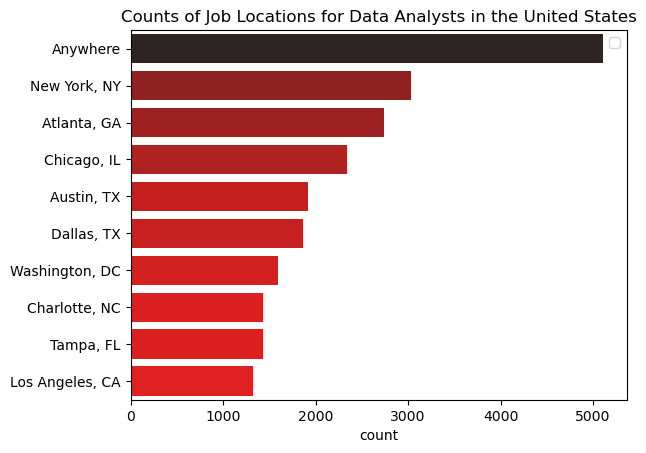

In [19]:
# plot a barchart using seaborn
sns.barplot(data=df_us_da_location, x='count', y='job_location', hue='count', palette='dark:r_r')
plt.title('Counts of Job Locations for Data Analysts in the United States')
plt.ylabel('')
plt.legend('')

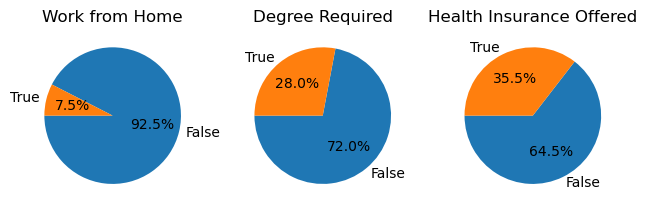

In [25]:
fig, ax = plt.subplots(1, 3)

dict_column = {

    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Required',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column , title) in enumerate (dict_column.items()):
    ax[i].pie(df_us_da_jobs[column].value_counts() ,startangle=180, autopct = '%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

fig.tight_layout()


In [26]:
df_company_name = df_us_da_jobs['company_name'].value_counts().head(10).to_frame()
df_company_name

,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


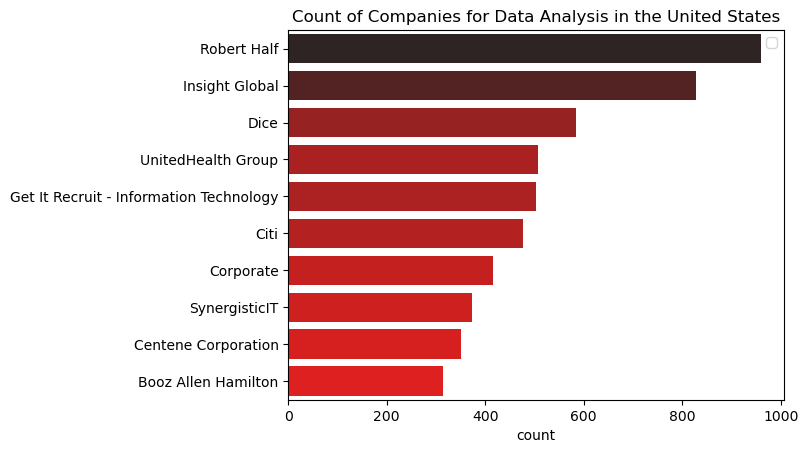

In [33]:
sns.barplot(data=df_company_name, x='count', y='company_name', hue='count', palette='dark:r_r')
plt.title('Count of Companies for Data Analysis in the United States')
plt.ylabel('')
plt.legend('')